In [1]:
#vyhladanie iba "na firmu co isli do hotela"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Explorativna analyza

In [4]:
#zobrazenie prvych piatich zaznamov "overenie dat"
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#zobrazenie poslednych piatich zaznamov "overenie dat"
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
#zobrazenie vsetkych dat, vieme zistit ci su nejake hodnoty chybajuce
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
#vyhodime ever_married, nakolko to nie je relevantny udaj a netreba snim pracovat
df.drop(df.columns[[5]], axis=1, inplace=True)

In [8]:
#zobrazime udaje a zistime ze neutral_location sa uz nenachadza
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 439.3+ KB


In [9]:
#zistenie poctu nulovych hodnot
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
#vymazali sme 201 chybnych zaznamov
df=df.dropna(subset=["bmi"])
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
#spravime po tom ako odstranime nulove zaznamy
#po odstraneni udajov mame 4303 udajov
#v datasete sa vyskytuju timy v rozmedzi 1 az 190 (nemusia byt vsetky)
#najviac golov domaci strelili v pocte 8
#najviac golov inkasovali domaci 7
#priemerny fifa rank domace timu zo vsetkych zapasov je 32
#priemerny fifa rank hostujuceho timu je 34 
#z tohto datasetu vidime ze su domace timy "prednostnovane tie lepsie"
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
#po in13 v HR
#zistime si ktore premenne su slovne a ktore su ciselne
ciselne_premenne=list(df.dtypes[df.dtypes!="object"].index.values)
slovne_premenne=list(df.dtypes[df.dtypes=="object"].index.values)

In [13]:
ciselne_premenne

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [14]:
slovne_premenne

['gender', 'work_type', 'Residence_type', 'smoking_status']

In [15]:
#naplnime si premenne predstavujuce polia udajmi, ktore prisluchaju jednotlivym riadkom pri danych premennych
#inak povedane priradi hodnoty a skopiruje cele stlpce pre dane premenne
df_ciselne_premenne = df.loc[:,ciselne_premenne]
df_slovne_premenne = df.loc[:,slovne_premenne]

In [16]:
#vypiseme si ciselne premenne a ich hodnoty
df_ciselne_premenne

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
5,56669,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...,...
5104,14180,13.0,0,0,103.08,18.6,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [17]:
#vypiseme si slovne premenne a ich hodnoty
df_slovne_premenne

,gender,work_type,Residence_type,smoking_status
0,Male,Private,Urban,formerly smoked
2,Male,Private,Rural,never smoked
3,Female,Private,Urban,smokes
4,Female,Self-employed,Rural,never smoked
5,Male,Private,Urban,formerly smoked
...,...,...,...,...
5104,Female,children,Rural,Unknown
5106,Female,Self-employed,Urban,never smoked
5107,Female,Self-employed,Rural,never smoked
5108,Male,Private,Rural,formerly smoked


In [ ]:
#nasa cielova hodnota (zavisla premenna je 'stroke', 
#cize ci pacient mal alebo nemal infarkt)
#v nasom pripade je cielova hodnota ciselna, cize ju nemusime upravovat

In [34]:
#ideme urcovat vztahy medzi zavislou premennou a nezavislimi premennymi 
#budeme to robit pomocou korelacie - vzajomny vztah dvomi alebo viacerymi premennymi
corr=df_ciselne_premenne.corr()

In [36]:
corr["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
bmi                  0.042374
id                   0.004839
Name: stroke, dtype: float64

In [37]:
#vysledky korelacie nam hovoria,
#ze najvacsi vztah je medzi infarktom a vekom pacienta.
#To znamena, ze ludia najcastejsie je infarkt vyvolany vekom.
#Taktiez je tam vsak aj hypertenzia a dalsie.
#BMI hra najmensiu rolu pri infarktoch

<AxesSubplot:>

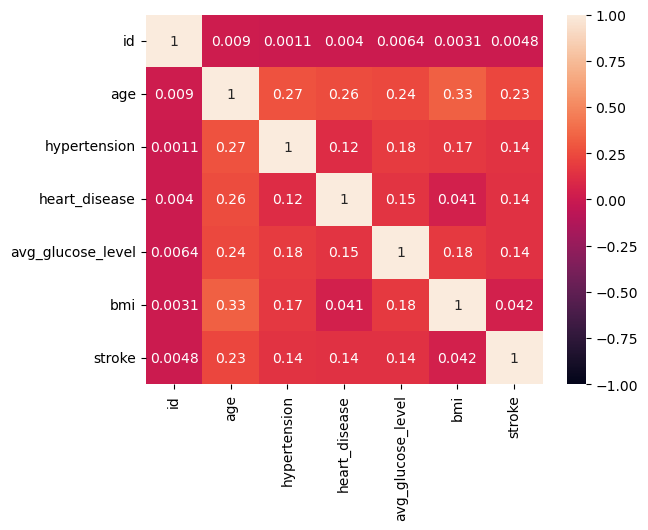

In [39]:
#pomocou heat mapy (tepelnej mapy)
#si vieme zobrazit vsetky vztahy medzi premennymi
sns.heatmap(corr,vmin=-1,vmax=1,annot=True )

<AxesSubplot:xlabel='stroke', ylabel='count'>

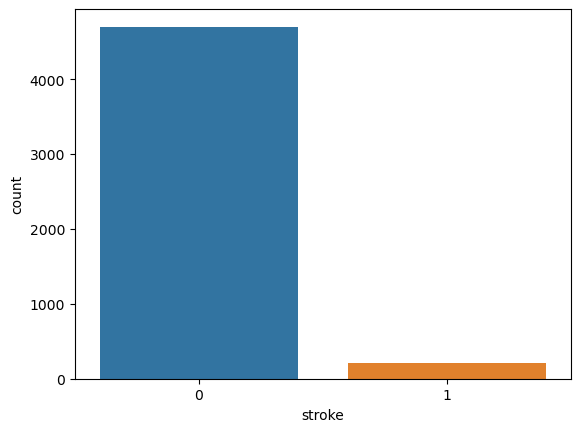

In [38]:
#mozeme si zobrazit pomer pacientov s infarktom a bez infarktu
sns.countplot(x = "stroke",data=df)

bmi    AxesSubplot(0.125,0.653529;0.227941x0.226471)
dtype: object

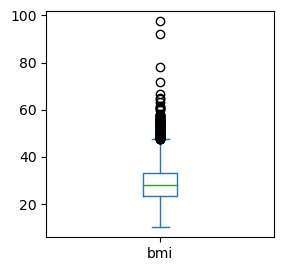

In [48]:
df.plot(column="bmi",kind="box",subplots=True,layout=(3,3),figsize=(10,10))

In [45]:
from scipy import stats #v podmodule stats sa nachádza funkcia na výpočet z-scóre (zscore)
df_wo_out = np.abs(stats.zscore(df_boston['DIS']))

df_wo_out

,id,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,children,Rural,95.12,18.0,Unknown,0
251,16523,Female,8.0,0,0,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,Never_worked,Rural,161.28,19.1,Unknown,0
254,32257,Female,47.0,0,0,Private,Urban,210.95,50.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0


id                      AxesSubplot(0.125,0.653529;0.227941x0.226471)
age                  AxesSubplot(0.398529,0.653529;0.227941x0.226471)
hypertension         AxesSubplot(0.672059,0.653529;0.227941x0.226471)
heart_disease           AxesSubplot(0.125,0.381765;0.227941x0.226471)
avg_glucose_level    AxesSubplot(0.398529,0.381765;0.227941x0.226471)
bmi                  AxesSubplot(0.672059,0.381765;0.227941x0.226471)
stroke                      AxesSubplot(0.125,0.11;0.227941x0.226471)
dtype: object

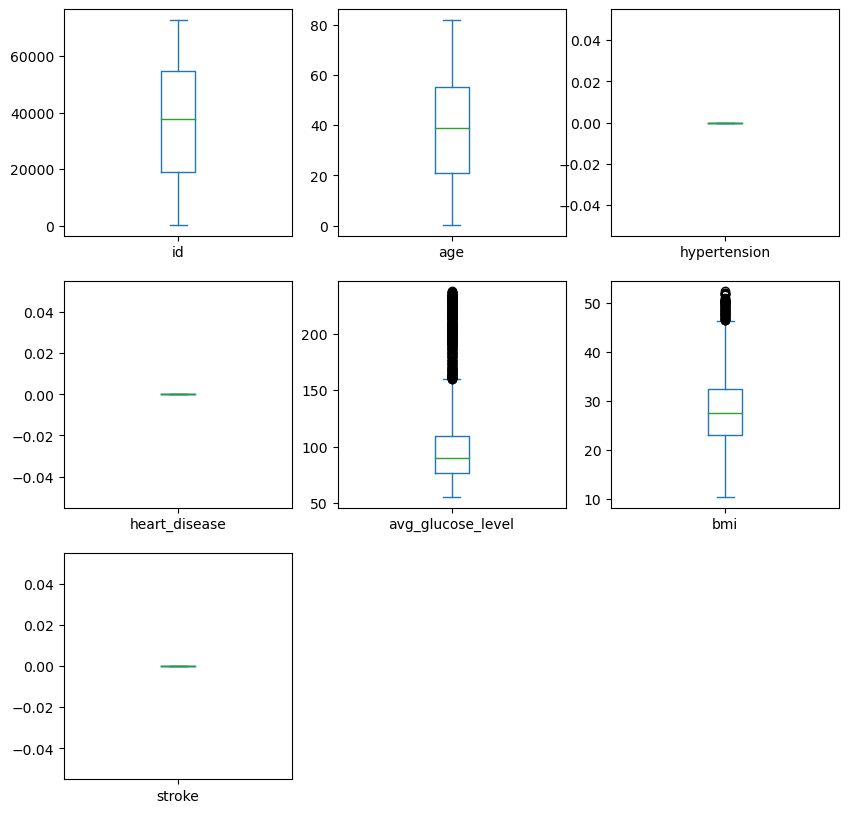

In [46]:
df_wo_out.plot(kind="box",subplots=True,layout=(3,3),figsize=(10,10))

# Vytvorenie trenovacej a testovacej casti

In [19]:
#zadefinovanie premennych
#do X idu stlpce, ktore urcuju stav pacienta
#do y ide len jeden stlpec a to ci pacient mal alebo nemal infarkt
X=df_ciselne_premenne[["age","hypertension","heart_disease","avg_glucose_level","bmi"]]
y=df_ciselne_premenne["stroke"]

In [20]:
#pouzivame funkciu na vytvorenie testovacej a trenovacej casti
#test_size sme nespecifikovali co znamena, ze je defaultne nastavena na 0.25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
#vidime, ze funkcia vlozila 25 percent hodnot z datasetu do testovacej casti
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3681, 5) (3681,)
(1228, 5) (1228,)


In [22]:
#zobrazenie trenovacej casti
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi
518,49.0,0,0,102.91,24.7
5019,29.0,0,0,185.27,31.3
787,31.0,0,0,109.68,41.8
553,55.0,0,0,76.20,27.9
1886,31.0,0,0,59.63,19.9
...,...,...,...,...,...
3864,2.0,0,0,65.21,17.2
3308,61.0,1,0,66.46,31.5
4034,60.0,0,0,87.62,30.1
3937,7.0,0,0,103.11,18.3


In [23]:
#zobrazenie testovacej casti
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi
2743,47.0,0,0,143.45,23.8
1107,22.0,0,0,73.40,21.6
3876,3.0,0,0,115.47,18.9
4232,5.0,0,0,79.33,15.0
736,20.0,0,0,74.02,22.3
...,...,...,...,...,...
4126,42.0,0,0,74.80,50.6
2427,37.0,0,0,77.37,21.4
3601,27.0,0,0,82.05,21.0
2901,50.0,0,0,121.17,25.5


In [24]:
#importujeme si kniznicne funkcie, pomocou ktorych zistime presnost 
#medzi testovacou castou a odhadovanymi cielovymi hodnotami
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(3) #vytvoríme knn klasifikátor
knn.fit(X_train, y_train) #trenovaci model
y_pred = knn.predict(X_test) #odhadovane cielove hodnoty
acc = accuracy_score(y_test, y_pred) #vypocet presnosti

#y_pred obsahuje 1228 odhadovanych hodnot 
#vypocet presnosti prebieha na zaklade predikcie z X test. hodnot (y_pred),
#ktore sa porovnavaju s y test hodnotami

acc #vypis presnosti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
